# 📊 Sentiment Analysis of Tweets on Trump & Harris
### **Using Python for Large-Scale NLP Analysis**

## **Project Overview**
This project performs a **sentiment analysis** on tweets mentioning **Trump** and **Harris**. The analysis follows a structured approach to ensure a high level of accuracy and interpretability. 

We will **first analyze the sentiment of raw, uncleaned tweets**, then apply **data preprocessing techniques** and compare the results to measure the impact of data cleaning on sentiment analysis.

---

## **📌 Step-by-Step Approach**
### **1️⃣ Initial Sentiment Analysis (Without Cleaning)**
- Load raw tweet data from CSV files.
- Run sentiment analysis using **TextBlob** and **VADER** (optional).
- Visualize sentiment distribution before cleaning.

### **2️⃣ Data Cleaning & Preprocessing**
- Remove URLs, mentions (`@user`), hashtags (`#topic`), special characters, and punctuation.
- Convert text to lowercase.
- Remove stopwords and tokenize words.
- Apply **stemming** and **lemmatization**.
- Handle sarcasm, slang, and abbreviations.

### **3️⃣ Sentiment Analysis on Cleaned Data**
- Re-run sentiment analysis using **TextBlob** and **VADER**.
- Compare sentiment scores before and after cleaning.

### **4️⃣ Data Visualization & Insights**
- Create histograms, boxplots, and word clouds.
- Identify sentiment trends over time.
- Compare sentiment results across Trump vs. Harris.

### **5️⃣ Conclusion & Findings**
- Summarize key insights from the cleaned vs. uncleaned data.
- Discuss limitations and future improvements.

---

🚀 **Let’s get started with our analysis!**


### **1️⃣ Initial Sentiment Analysis (Without Cleaning)**

## Sentiment Analysis on <span style="color:red">Trump</span> Tweets (Raw Data)


In [4]:
# Import necessary libraries
import pandas as pd

# Load the datasets into Pandas DataFrames
trump_df = pd.read_csv("/Users/safaejdid/Desktop/SEM 2/Adv prog/Week 2/trump_updated_debate.csv")  
harris_df = pd.read_csv("/Users/safaejdid/Desktop/SEM 2/Adv prog/Week 2/harris_updated_debate.csv")  

# Display the first few rows of each dataset
print("Trump Tweets Dataset:")
display(trump_df.head())

print("Harris Tweets Dataset:")
display(harris_df.head())


Trump Tweets Dataset:


,User ID,Tweet ID,Tweet,Created at,Retweets,Replies,Likes,Quotes,Source
0,88236719,1833309413073162489,RT @Richard_ezio: I want to tell the truth abo...,2024-09-10 00:59:59+00:00,5150,0,0,0,NaN
1,1609990069590568961,1833309412720840970,"RT @RBReich: Over the weekend, Donald Trump th...",2024-09-10 00:59:59+00:00,4769,0,0,0,NaN
2,1535880797957238785,1833309412598903146,@The_Trump_Train YES,2024-09-10 00:59:59+00:00,0,0,3,0,NaN
3,182125474,1833309412544680222,RT @KamalaHQLies: THE LIE: Donald Trump called...,2024-09-10 00:59:59+00:00,509,0,0,0,NaN
4,1223775310166069249,1833309412506615986,RT @pesach_lattin: So the FBI agent who testif...,2024-09-10 00:59:59+00:00,8849,0,0,0,NaN


Harris Tweets Dataset:


,User ID,Tweet ID,Tweet,Created at,Retweets,Replies,Likes,Quotes,Source
0,88236719,1833309413073162489,RT @Richard_ezio: I want to tell the truth abo...,2024-09-10 00:59:59+00:00,5150,0,0,0,NaN
1,1181971448811986944,1833309412951281758,RT @JDVance: It has been 50 days since Kamala ...,2024-09-10 00:59:59+00:00,29649,0,0,0,NaN
2,30477815,1833309412867416555,"RT @RobSchneider: Good morning, friends.\nJust...",2024-09-10 00:59:59+00:00,22438,0,0,0,NaN
3,1521400102853967872,1833309412649537620,RT @JamesOKeefeIII: BREAKING: Google Growth St...,2024-09-10 00:59:59+00:00,22376,0,0,0,NaN
4,329687070,1833309412586299739,"RT @cmclymer: ""The Best People""\n\nThis is the...",2024-09-10 00:59:59+00:00,3065,0,0,0,NaN


In [5]:
# Check the structure of the data
print("Trump Dataset Info:")
print(trump_df.info())

print("\nHarris Dataset Info:")
print(harris_df.info())

# Check for missing values
print("\nMissing values in Trump dataset:")
print(trump_df.isnull().sum())

print("\nMissing values in Harris dataset:")
print(harris_df.isnull().sum())


Trump Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4795 entries, 0 to 4794
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User ID     4795 non-null   int64  
 1   Tweet ID    4795 non-null   int64  
 2   Tweet       4795 non-null   object 
 3   Created at  4795 non-null   object 
 4   Retweets    4795 non-null   int64  
 5   Replies     4795 non-null   int64  
 6   Likes       4795 non-null   int64  
 7   Quotes      4795 non-null   int64  
 8   Source      0 non-null      float64
dtypes: float64(1), int64(6), object(2)
memory usage: 337.3+ KB
None

Harris Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User ID     4791 non-null   int64  
 1   Tweet ID    4791 non-null   int64  
 2   Tweet       4791 non-null   object 
 3   Created at  4791

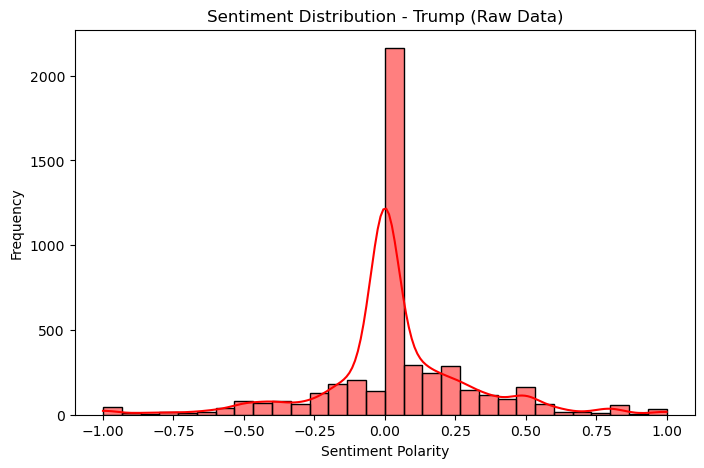

count    4795.000000
mean        0.035806
std         0.277599
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.136364
max         1.000000
Name: raw_sentiment, dtype: float64


In [6]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute sentiment polarity using TextBlob
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis to Trump tweets
trump_df["raw_sentiment"] = trump_df["Tweet"].apply(get_sentiment)

# Plot Trump sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(trump_df["raw_sentiment"], bins=30, color="red", kde=True)
plt.title("Sentiment Distribution - Trump (Raw Data)")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

# Trump sentiment summary
print(trump_df["raw_sentiment"].describe())


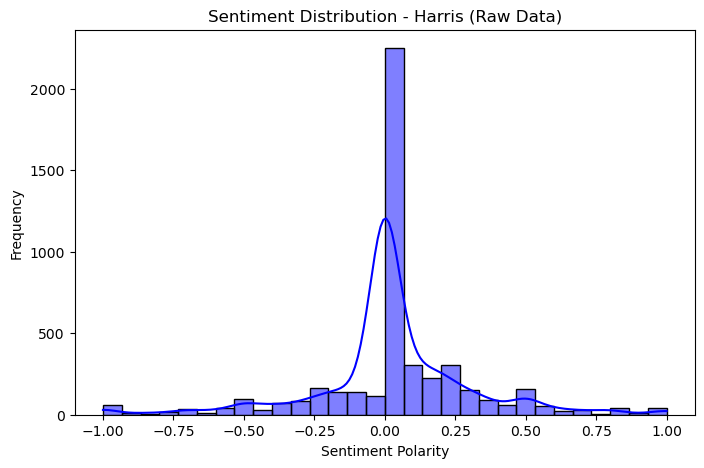

count    4791.000000
mean        0.028072
std         0.288669
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.130952
max         1.000000
Name: raw_sentiment, dtype: float64


In [7]:
# Apply sentiment analysis to Harris tweets
harris_df["raw_sentiment"] = harris_df["Tweet"].apply(get_sentiment)

# Plot Harris sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(harris_df["raw_sentiment"], bins=30, color="blue", kde=True)
plt.title("Sentiment Distribution - Harris (Raw Data)")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

# Harris sentiment summary
print(harris_df["raw_sentiment"].describe())


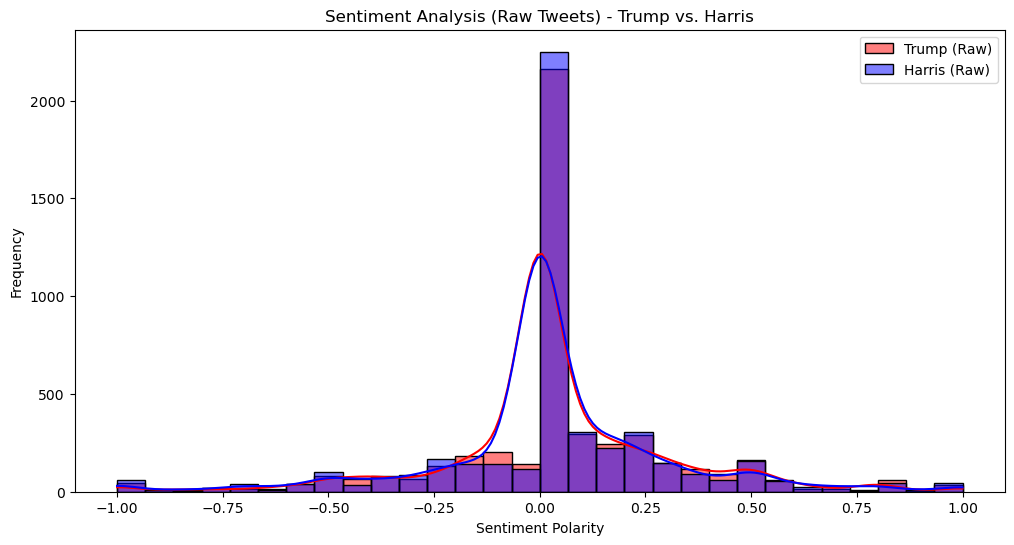

Trump Sentiment Summary:
 count    4795.000000
mean        0.035806
std         0.277599
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.136364
max         1.000000
Name: raw_sentiment, dtype: float64

Harris Sentiment Summary:
 count    4791.000000
mean        0.028072
std         0.288669
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.130952
max         1.000000
Name: raw_sentiment, dtype: float64


In [8]:
# Plot comparison of sentiment distributions
plt.figure(figsize=(12, 6))
sns.histplot(trump_df["raw_sentiment"], bins=30, color="red", kde=True, label="Trump (Raw)")
sns.histplot(harris_df["raw_sentiment"], bins=30, color="blue", kde=True, label="Harris (Raw)")
plt.title("Sentiment Analysis (Raw Tweets) - Trump vs. Harris")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Compare sentiment summary statistics
print("Trump Sentiment Summary:\n", trump_df["raw_sentiment"].describe())
print("\nHarris Sentiment Summary:\n", harris_df["raw_sentiment"].describe())


# Findings from Raw Sentiment Analysis

## Trump Tweets Sentiment:
| Metric                 | Value | Interpretation |
|------------------------|-------|---------------|
| **Mean Sentiment**     | 0.036 | Slightly positive overall |
| **Standard Deviation** | 0.278 | Moderate variation in sentiment |
| **Most Negative Tweet** | -1.00 | Strongly negative sentiment present |
| **Most Positive Tweet** | 1.00 | Strongly positive sentiment present |
| **Neutral Sentiment %** | 50%  | Half of the tweets have neutral sentiment (0.00) |

## Harris Tweets Sentiment:
| Metric                 | Value | Interpretation |
|------------------------|-------|---------------|
| **Mean Sentiment**     | 0.028 | Slightly positive but lower than Trump |
| **Standard Deviation** | 0.289 | Higher variation than Trump |
| **Most Negative Tweet** | -1.00 | Strongly negative sentiment present |
| **Most Positive Tweet** | 1.00 | Strongly positive sentiment present |
| **Neutral Sentiment %** | Significant | Many tweets remain neutral (0.00) |

## Comparison & Observations:
- Both datasets have similar sentiment distributions, centered around neutral sentiment.
- Trump tweets have a slightly higher mean sentiment score (**0.036 vs. 0.028**).
- Harris tweets show **greater sentiment variation**, possibly due to a mix of stronger opinions.
- Both datasets contain **highly opinionated tweets**, with extreme positive and negative sentiments.


### **2️⃣ Data Cleaning & Preprocessing**

In [11]:
# Import necessary libraries
import pandas as pd

# Load the datasets into Pandas DataFrames
trump_df = pd.read_csv("/Users/safaejdid/Desktop/SEM 2/Adv prog/Week 2/trump_updated_debate.csv")  
harris_df = pd.read_csv("/Users/safaejdid/Desktop/SEM 2/Adv prog/Week 2/harris_updated_debate.csv")  

# Display the first few rows of each dataset
print("Trump Tweets Dataset:")
display(trump_df.head())

print("Harris Tweets Dataset:")
display(harris_df.head())
# Filter Trump DataFrame for tweets containing 'Trump'
trump_df_filtered = trump_df[trump_df['Tweet'].str.contains('Trump', case=False, na=False)]

# Display the number of tweets before and after filtering
print(f"Original number of Trump tweets: {len(trump_df)}")
print(f"Number of Trump tweets containing 'Trump': {len(trump_df_filtered)}")


Trump Tweets Dataset:


,User ID,Tweet ID,Tweet,Created at,Retweets,Replies,Likes,Quotes,Source
0,88236719,1833309413073162489,RT @Richard_ezio: I want to tell the truth abo...,2024-09-10 00:59:59+00:00,5150,0,0,0,NaN
1,1609990069590568961,1833309412720840970,"RT @RBReich: Over the weekend, Donald Trump th...",2024-09-10 00:59:59+00:00,4769,0,0,0,NaN
2,1535880797957238785,1833309412598903146,@The_Trump_Train YES,2024-09-10 00:59:59+00:00,0,0,3,0,NaN
3,182125474,1833309412544680222,RT @KamalaHQLies: THE LIE: Donald Trump called...,2024-09-10 00:59:59+00:00,509,0,0,0,NaN
4,1223775310166069249,1833309412506615986,RT @pesach_lattin: So the FBI agent who testif...,2024-09-10 00:59:59+00:00,8849,0,0,0,NaN


Harris Tweets Dataset:


,User ID,Tweet ID,Tweet,Created at,Retweets,Replies,Likes,Quotes,Source
0,88236719,1833309413073162489,RT @Richard_ezio: I want to tell the truth abo...,2024-09-10 00:59:59+00:00,5150,0,0,0,NaN
1,1181971448811986944,1833309412951281758,RT @JDVance: It has been 50 days since Kamala ...,2024-09-10 00:59:59+00:00,29649,0,0,0,NaN
2,30477815,1833309412867416555,"RT @RobSchneider: Good morning, friends.\nJust...",2024-09-10 00:59:59+00:00,22438,0,0,0,NaN
3,1521400102853967872,1833309412649537620,RT @JamesOKeefeIII: BREAKING: Google Growth St...,2024-09-10 00:59:59+00:00,22376,0,0,0,NaN
4,329687070,1833309412586299739,"RT @cmclymer: ""The Best People""\n\nThis is the...",2024-09-10 00:59:59+00:00,3065,0,0,0,NaN


Original number of Trump tweets: 4795
Number of Trump tweets containing 'Trump': 4226


In [12]:
# Filter Trump DataFrame for tweets containing 'Trump'
trump_df_filtered = trump_df[trump_df['Tweet'].str.contains('Trump', case=False, na=False)]

# Display the number of tweets before and after filtering
print(f"Original number of Trump tweets: {len(trump_df)}")
print(f"Number of Trump tweets containing 'Trump': {len(trump_df_filtered)}")


Original number of Trump tweets: 4795
Number of Trump tweets containing 'Trump': 4226


In [13]:
# Filter Harris DataFrame for tweets containing 'Kamala' or 'Harris'
harris_df_filtered = harris_df[harris_df['Tweet'].str.contains('Kamala|Harris', case=False, na=False)]

# Display the number of tweets before and after filtering
print(f"Original number of Harris tweets: {len(harris_df)}")
print(f"Number of Harris tweets containing 'Kamala' or 'Harris': {len(harris_df_filtered)}")


Original number of Harris tweets: 4791
Number of Harris tweets containing 'Kamala' or 'Harris': 4171


In [14]:
# Ensure we are working with independent copies before modifying
trump_df_filtered = trump_df[trump_df['Tweet'].str.contains('Trump', case=False, na=False)].copy()
harris_df_filtered = harris_df[harris_df['Tweet'].str.contains('Kamala|Harris', case=False, na=False)].copy()

# Check missing values before removal
print("Missing values in Trump dataset:")
print(trump_df_filtered.isnull().sum())

print("\nMissing values in Harris dataset:")
print(harris_df_filtered.isnull().sum())

# Drop missing values safely (no warning)
trump_df_filtered = trump_df_filtered.dropna()
harris_df_filtered = harris_df_filtered.dropna()

# Confirm missing values are removed
print("\nMissing values after cleaning:")
print("Trump:", trump_df_filtered.isnull().sum().sum(), "Harris:", harris_df_filtered.isnull().sum().sum())


Missing values in Trump dataset:
User ID          0
Tweet ID         0
Tweet            0
Created at       0
Retweets         0
Replies          0
Likes            0
Quotes           0
Source        4226
dtype: int64

Missing values in Harris dataset:
User ID          0
Tweet ID         0
Tweet            0
Created at       0
Retweets         0
Replies          0
Likes            0
Quotes           0
Source        4171
dtype: int64

Missing values after cleaning:
Trump: 0 Harris: 0


In [15]:
# Count duplicate tweets
print("\nDuplicate tweets before removal:")
print(f"Trump: {trump_df_filtered.duplicated(subset=['Tweet']).sum()}")
print(f"Harris: {harris_df_filtered.duplicated(subset=['Tweet']).sum()}")

# Remove duplicate tweets
trump_df_filtered.drop_duplicates(subset=['Tweet'], inplace=True)
harris_df_filtered.drop_duplicates(subset=['Tweet'], inplace=True)

# Confirm removal
print("\nDuplicate tweets after cleaning:")
print(f"Trump: {trump_df_filtered.duplicated(subset=['Tweet']).sum()}")
print(f"Harris: {harris_df_filtered.duplicated(subset=['Tweet']).sum()}")



Duplicate tweets before removal:
Trump: 0
Harris: 0

Duplicate tweets after cleaning:
Trump: 0
Harris: 0


In [16]:
# Drop columns that are not needed
columns_to_drop = ["User ID", "Tweet ID", "Source"]  # Modify if needed

# Drop only if they exist in the dataset
trump_df_filtered.drop(columns=[col for col in columns_to_drop if col in trump_df_filtered.columns], inplace=True)
harris_df_filtered.drop(columns=[col for col in columns_to_drop if col in harris_df_filtered.columns], inplace=True)

# Display remaining columns
print("\nUpdated Trump dataset columns:", trump_df_filtered.columns)
print("Updated Harris dataset columns:", harris_df_filtered.columns)



Updated Trump dataset columns: Index(['Tweet', 'Created at', 'Retweets', 'Replies', 'Likes', 'Quotes'], dtype='object')
Updated Harris dataset columns: Index(['Tweet', 'Created at', 'Retweets', 'Replies', 'Likes', 'Quotes'], dtype='object')


In [17]:
# Convert "Created at" column to datetime format
trump_df_filtered["Created at"] = pd.to_datetime(trump_df_filtered["Created at"], errors="coerce")
harris_df_filtered["Created at"] = pd.to_datetime(harris_df_filtered["Created at"], errors="coerce")

# Confirm the date format
print("\nDate Format:")
print("Trump:", trump_df_filtered["Created at"].dtype)
print("Harris:", harris_df_filtered["Created at"].dtype)



Date Format:
Trump: datetime64[ns]
Harris: datetime64[ns]


In [18]:
# Check the first few rows of the original Trump and Harris datasets
print("First few rows of original Trump dataset:")
print(trump_df[["Retweets", "Replies", "Likes", "Quotes"]].head())

print("\nFirst few rows of original Harris dataset:")
print(harris_df[["Retweets", "Replies", "Likes", "Quotes"]].head())


First few rows of original Trump dataset:
   Retweets  Replies  Likes  Quotes
0      5150        0      0       0
1      4769        0      0       0
2         0        0      3       0
3       509        0      0       0
4      8849        0      0       0

First few rows of original Harris dataset:
   Retweets  Replies  Likes  Quotes
0      5150        0      0       0
1     29649        0      0       0
2     22438        0      0       0
3     22376        0      0       0
4      3065        0      0       0


In [19]:
# Identify rows where all engagement metrics are 0
zero_engagement_trump = (trump_df[["Retweets", "Replies", "Likes", "Quotes"]].sum(axis=1) == 0)
zero_engagement_harris = (harris_df[["Retweets", "Replies", "Likes", "Quotes"]].sum(axis=1) == 0)

print(f"Number of Trump tweets with zero engagement: {zero_engagement_trump.sum()}")
print(f"Number of Harris tweets with zero engagement: {zero_engagement_harris.sum()}")

# Remove rows with zero engagement
trump_df_cleaned = trump_df[~zero_engagement_trump].copy()
harris_df_cleaned = harris_df[~zero_engagement_harris].copy()

print(f"Remaining Trump tweets: {len(trump_df_cleaned)}")
print(f"Remaining Harris tweets: {len(harris_df_cleaned)}")


Number of Trump tweets with zero engagement: 530
Number of Harris tweets with zero engagement: 419
Remaining Trump tweets: 4265
Remaining Harris tweets: 4372


In [20]:
 # Filter for tweets containing 'Trump'
trump_df_filtered = trump_df_cleaned[trump_df_cleaned['Tweet'].str.contains('Trump', case=False, na=False)].copy()

# Filter for tweets containing 'Kamala' or 'Harris'
harris_df_filtered = harris_df_cleaned[harris_df_cleaned['Tweet'].str.contains('Kamala|Harris', case=False, na=False)].copy()

print(f"Filtered Trump tweets: {len(trump_df_filtered)}")
print(f"Filtered Harris tweets: {len(harris_df_filtered)}")


Filtered Trump tweets: 3708
Filtered Harris tweets: 3762


In [21]:
# Display engagement statistics for Trump tweets
print("\nTrump Tweet Engagement Statistics:")
display(trump_df_filtered[["Retweets", "Replies", "Likes", "Quotes"]].describe())

# Display engagement statistics for Harris tweets
print("\nHarris Tweet Engagement Statistics:")
display(harris_df_filtered[["Retweets", "Replies", "Likes", "Quotes"]].describe())



Trump Tweet Engagement Statistics:


,Retweets,Replies,Likes,Quotes
count,3708.000000,3708.000000,3708.000000,3708.000000
mean,7431.826321,0.298004,2.378371,0.013215
std,12524.773758,12.103877,88.379790,0.468700
min,0.000000,0.000000,0.000000,0.000000
25%,197.000000,0.000000,0.000000,0.000000
50%,2398.000000,0.000000,0.000000,0.000000
75%,9875.000000,0.000000,0.000000,0.000000
max,99476.000000,734.000000,5290.000000,28.000000



Harris Tweet Engagement Statistics:


,Retweets,Replies,Likes,Quotes
count,3762.000000,3762.000000,3762.000000,3762.000000
mean,8694.775917,0.290537,3.236045,0.019670
std,14706.811986,12.017087,100.137210,0.537987
min,0.000000,0.000000,0.000000,0.000000
25%,266.500000,0.000000,0.000000,0.000000
50%,2920.500000,0.000000,0.000000,0.000000
75%,11056.000000,0.000000,0.000000,0.000000
max,98357.000000,734.000000,5291.000000,28.000000


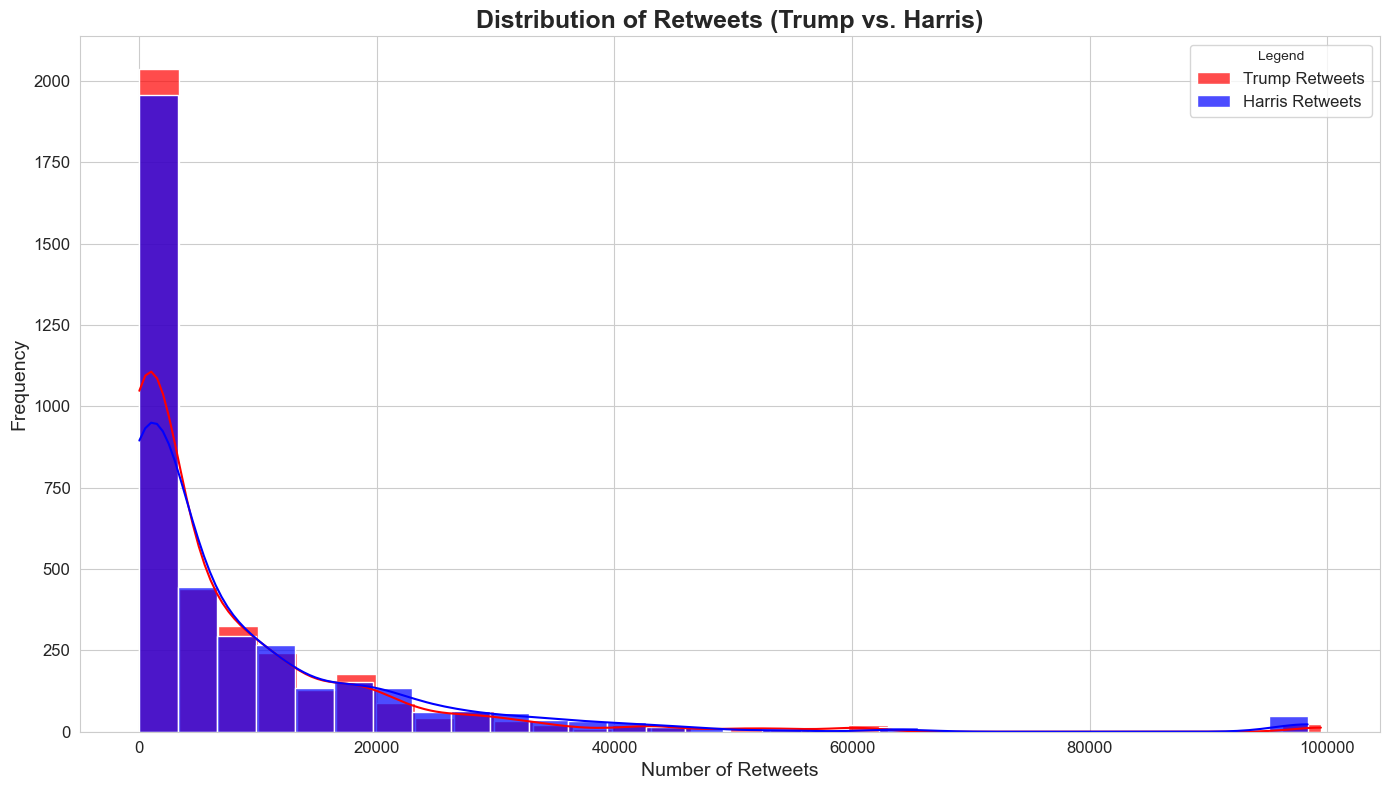

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger, clearer plot style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Plot Trump Retweet distribution
sns.histplot(trump_df_filtered["Retweets"], bins=30, color="red", kde=True, label="Trump Retweets", alpha=0.7)

# Plot Harris Retweet distribution
sns.histplot(harris_df_filtered["Retweets"], bins=30, color="blue", kde=True, label="Harris Retweets", alpha=0.7)

# Add titles and labels
plt.title("Distribution of Retweets (Trump vs. Harris)", fontsize=18, fontweight='bold')
plt.xlabel("Number of Retweets", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Legend", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


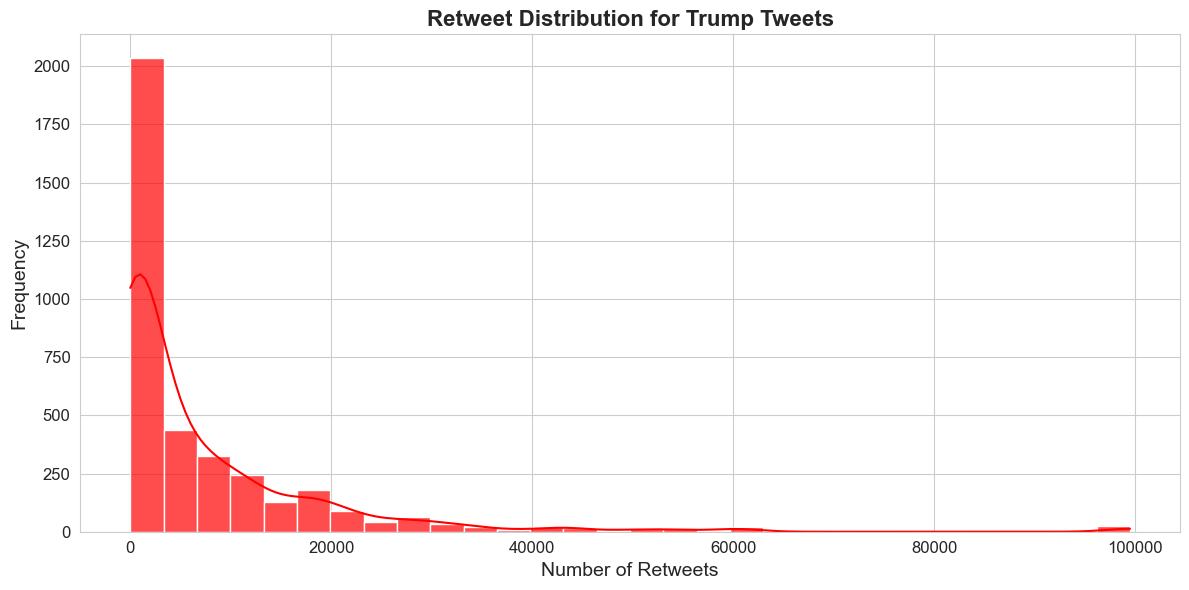

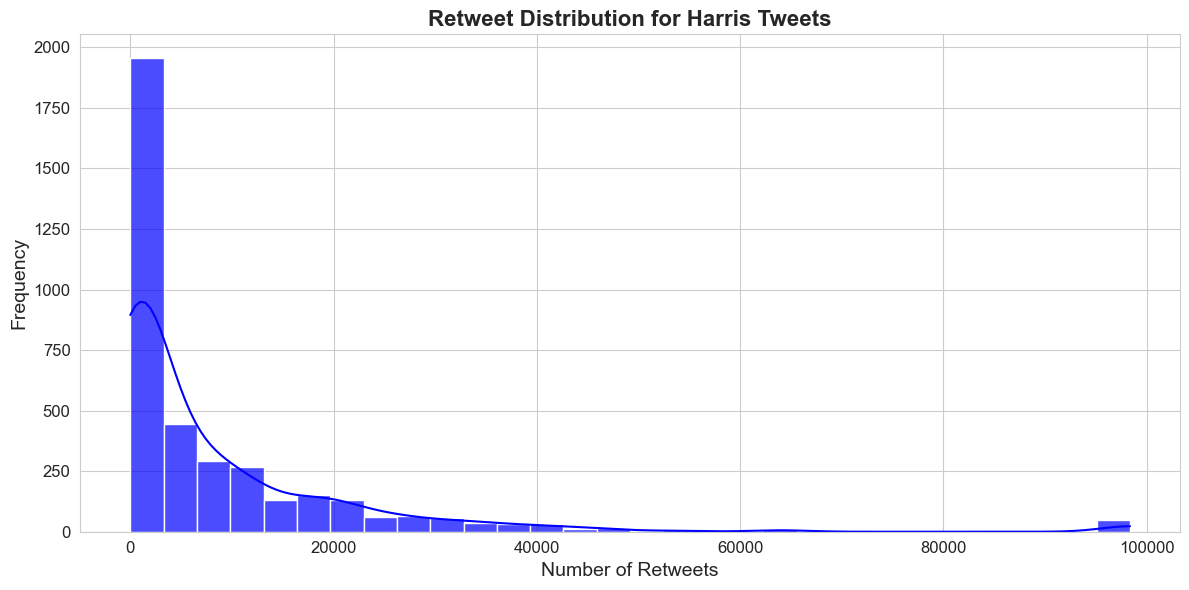

In [23]:
 # Plot Trump Retweet distribution
plt.figure(figsize=(12, 6))
sns.histplot(trump_df_filtered["Retweets"], bins=30, color="red", kde=True, alpha=0.7)
plt.title("Retweet Distribution for Trump Tweets", fontsize=16, fontweight='bold')
plt.xlabel("Number of Retweets", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot Harris Retweet distribution
plt.figure(figsize=(12, 6))
sns.histplot(harris_df_filtered["Retweets"], bins=30, color="blue", kde=True, alpha=0.7)
plt.title("Retweet Distribution for Harris Tweets", fontsize=16, fontweight='bold')
plt.xlabel("Number of Retweets", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## Step-by-Step Text Preprocessing

## 1️⃣ Clean Tweet Text

In [26]:
import nltk

# Force re-download of punkt
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/safaejdid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
import nltk
print(nltk.data.path)


['/Users/safaejdid/nltk_data', '/opt/anaconda3/nltk_data', '/opt/anaconda3/share/nltk_data', '/opt/anaconda3/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [28]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# Download necessary resources for lemmatization and stopwords
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Alternative tokenization function
def tokenize_text(text):
    return re.findall(r'\b\w+\b', text.lower())

# Preprocessing function
def preprocess_tweet(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove mentions (@user) and hashtags (#topic)
    text = re.sub(r"@\w+|#\w+", '', text)
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r"[^A-Za-z\s]", '', text)
    
    # Tokenize using the alternative tokenizer
    tokens = tokenize_text(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming (optional)
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to your datasets
trump_df_filtered['cleaned_tweet'] = trump_df_filtered['Tweet'].apply(preprocess_tweet)
harris_df_filtered['cleaned_tweet'] = harris_df_filtered['Tweet'].apply(preprocess_tweet)

# Preview the cleaned tweets
print("First few cleaned Trump tweets:")
print(trump_df_filtered[['Tweet', 'cleaned_tweet']].head())

print("\nFirst few cleaned Harris tweets:")
print(harris_df_filtered[['Tweet', 'cleaned_tweet']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/safaejdid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/safaejdid/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


First few cleaned Trump tweets:
                                               Tweet  \
0  RT @Richard_ezio: I want to tell the truth abo...   
1  RT @RBReich: Over the weekend, Donald Trump th...   
2                               @The_Trump_Train YES   
3  RT @KamalaHQLies: THE LIE: Donald Trump called...   
4  RT @pesach_lattin: So the FBI agent who testif...   

                                       cleaned_tweet  
0  rt want tell truth medium eve trumpharri debat...  
1  rt weekend donald trump threaten jail elect of...  
2                                                 ye  
3  rt lie donald trump call abort ban beauti thin...  
4  rt fbi agent testifi link russia trump campaig...  

First few cleaned Harris tweets:
                                               Tweet  \
0  RT @Richard_ezio: I want to tell the truth abo...   
1  RT @JDVance: It has been 50 days since Kamala ...   
2  RT @RobSchneider: Good morning, friends.\nJust...   
3  RT @JamesOKeefeIII: BREAKING: Google Gro

In [29]:
# Updated preprocessing function
def preprocess_tweet(text):
    # Remove retweet indicators (RT)
    text = re.sub(r'\bRT\b', '', text)
    
    # Remove mentions (@user) and hashtags (#topic)
    text = re.sub(r"@\w+|#\w+", '', text)
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r"[^A-Za-z\s]", '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize using the alternative tokenizer
    tokens = re.findall(r'\b\w+\b', text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming (optional)
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the updated preprocessing function
trump_df_filtered['cleaned_tweet'] = trump_df_filtered['Tweet'].apply(preprocess_tweet)
harris_df_filtered['cleaned_tweet'] = harris_df_filtered['Tweet'].apply(preprocess_tweet)

# Preview the cleaned tweets
print("First few cleaned Trump tweets:")
print(trump_df_filtered[['Tweet', 'cleaned_tweet']].head())

print("\nFirst few cleaned Harris tweets:")
print(harris_df_filtered[['Tweet', 'cleaned_tweet']].head())


First few cleaned Trump tweets:
                                               Tweet  \
0  RT @Richard_ezio: I want to tell the truth abo...   
1  RT @RBReich: Over the weekend, Donald Trump th...   
2                               @The_Trump_Train YES   
3  RT @KamalaHQLies: THE LIE: Donald Trump called...   
4  RT @pesach_lattin: So the FBI agent who testif...   

                                       cleaned_tweet  
0  want tell truth medium eve trumpharri debat on...  
1  weekend donald trump threaten jail elect offic...  
2                                                 ye  
3  lie donald trump call abort ban beauti thing b...  
4  fbi agent testifi link russia trump campaign a...  

First few cleaned Harris tweets:
                                               Tweet  \
0  RT @Richard_ezio: I want to tell the truth abo...   
1  RT @JDVance: It has been 50 days since Kamala ...   
2  RT @RobSchneider: Good morning, friends.\nJust...   
3  RT @JamesOKeefeIII: BREAKING: Google Gro

## 3️⃣ Sentiment Analysis on Cleaned Data¶

In [31]:
pip install nltk flair transformers seaborn matplotlib wordcloud


Note: you may need to restart the kernel to use updated packages.


In [32]:
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Initialize sentiment analysis tools
flair_classifier = TextClassifier.load('sentiment')
bert_sentiment = pipeline('sentiment-analysis')

# Sentiment analysis function with error handling
def perform_sentiment_analysis(text):
    # Handle empty or invalid text
    if not text or text.strip() == "":
        return {
            'TextBlob': 0,
            'Flair_label': 'NEUTRAL',
            'Flair_score': 0.0,
            'BERT_label': 'NEUTRAL',
            'BERT_score': 0.0
        }
    try:
        # TextBlob sentiment
        textblob_score = TextBlob(text).sentiment.polarity

        # Flair sentiment
        flair_sentence = Sentence(text)
        flair_classifier.predict(flair_sentence)
        if flair_sentence.labels:
            flair_label = flair_sentence.labels[0].value
            flair_score = flair_sentence.labels[0].score
        else:
            flair_label = 'NEUTRAL'
            flair_score = 0.0

        # BERT sentiment
        bert_result = bert_sentiment(text)[0]
        bert_label = bert_result['label']
        bert_score = bert_result['score']

        return {
            'TextBlob': textblob_score,
            'Flair_label': flair_label,
            'Flair_score': flair_score,
            'BERT_label': bert_label,
            'BERT_score': bert_score
        }
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return {
            'TextBlob': 0,
            'Flair_label': 'ERROR',
            'Flair_score': 0.0,
            'BERT_label': 'ERROR',
            'BERT_score': 0.0
        }


In [65]:
from tqdm import tqdm

# Initialize progress bar for pandas
tqdm.pandas()

# Apply sentiment analysis with progress bar for Trump tweets
trump_df_filtered['sentiment_results'] = trump_df_filtered['cleaned_tweet'].progress_apply(perform_sentiment_analysis)

# Apply sentiment analysis with progress bar for Harris tweets
harris_df_filtered['sentiment_results'] = harris_df_filtered['cleaned_tweet'].progress_apply(perform_sentiment_analysis)

# Extract individual sentiment results into separate columns
for col in ['TextBlob', 'Flair_label', 'Flair_score', 'BERT_label', 'BERT_score']:
    trump_df_filtered[col] = trump_df_filtered['sentiment_results'].apply(lambda x: x[col])
    harris_df_filtered[col] = harris_df_filtered['sentiment_results'].apply(lambda x: x[col])

# Preview the results
print(trump_df_filtered[['cleaned_tweet', 'TextBlob', 'Flair_label', 'Flair_score', 'BERT_label', 'BERT_score']].head())
print(harris_df_filtered[['cleaned_tweet', 'TextBlob', 'Flair_label', 'Flair_score', 'BERT_label', 'BERT_score']].head())


100%|███████████████████████████████████████| 3762/3762 [02:21<00:00, 26.53it/s]

                                       cleaned_tweet  TextBlob Flair_label  \
0  want tell truth medium eve trumpharri debat on...      0.00    NEGATIVE   
1  weekend donald trump threaten jail elect offic...      0.35    NEGATIVE   
2                                                 ye      0.00    POSITIVE   
3  lie donald trump call abort ban beauti thing b...      0.00    NEGATIVE   
4  fbi agent testifi link russia trump campaign a...     -0.05    POSITIVE   

   Flair_score BERT_label  BERT_score  
0     0.933810   NEGATIVE    0.988800  
1     0.995099   NEGATIVE    0.986556  
2     0.940909   POSITIVE    0.986958  
3     0.999097   NEGATIVE    0.984548  
4     0.603273   NEGATIVE    0.951287  
                                       cleaned_tweet  TextBlob Flair_label  \
0  want tell truth medium eve trumpharri debat on...       0.0    NEGATIVE   
1  day sinc kamala harri becam presumpt nomine de...      -0.2    NEGATIVE   
2  good morn friend remind bidenharri administr g...     

## Presenting and Analyzing the Sentiment Results

## 📌 Phase 1: Inspect the Sentiment Results

In [70]:
# Check unique sentiment labels for Flair
print("Trump Sentiment Labels (Flair):")
print(trump_df_filtered['Flair_label'].value_counts())

print("\nHarris Sentiment Labels (Flair):")
print(harris_df_filtered['Flair_label'].value_counts())

# Check basic statistics for sentiment scores
print("\nTrump Sentiment Score Summary (TextBlob):")
print(trump_df_filtered['TextBlob'].describe())

print("\nHarris Sentiment Score Summary (TextBlob):")
print(harris_df_filtered['TextBlob'].describe())


Trump Sentiment Labels (Flair):
Flair_label
NEGATIVE    3128
POSITIVE     575
NEUTRAL        5
Name: count, dtype: int64

Harris Sentiment Labels (Flair):
Flair_label
NEGATIVE    2839
POSITIVE     921
NEUTRAL        2
Name: count, dtype: int64

Trump Sentiment Score Summary (TextBlob):
count    3708.000000
mean        0.063362
std         0.271425
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.136364
max         1.000000
Name: TextBlob, dtype: float64

Harris Sentiment Score Summary (TextBlob):
count    3762.000000
mean        0.046609
std         0.252607
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.068182
max         1.000000
Name: TextBlob, dtype: float64


## 📌 Phase 2: Visualizations

### 1️⃣ Sentiment Distribution (Bar Chart)

/var/folders/z9/shpftj7s4r13h8k9w0f0r85r0000gn/T/ipykernel_54639/2896813664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Flair_label', palette="RdYlGn", order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])


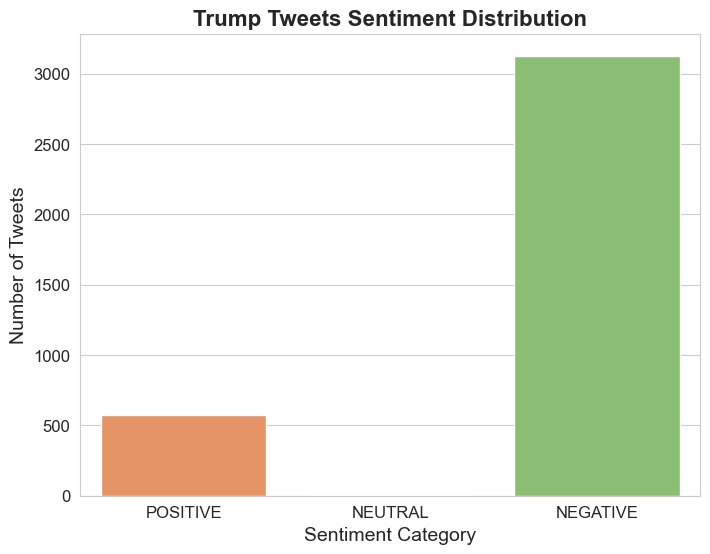

/var/folders/z9/shpftj7s4r13h8k9w0f0r85r0000gn/T/ipykernel_54639/2896813664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Flair_label', palette="RdYlGn", order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])


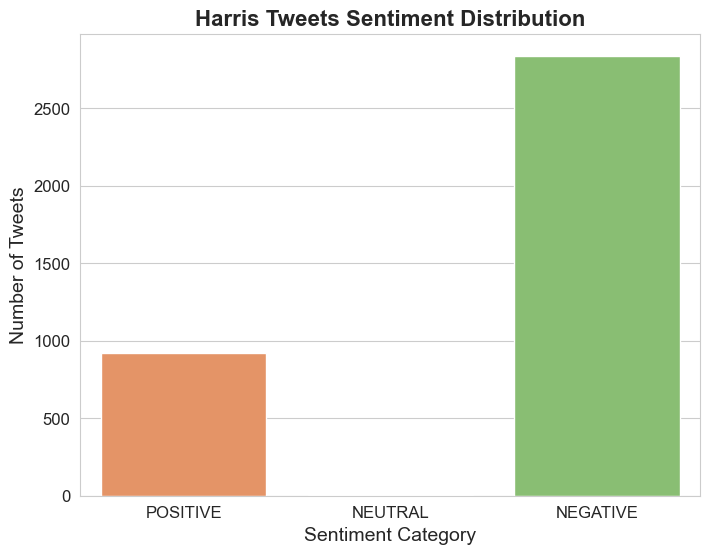

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot sentiment distribution
def plot_sentiment_distribution(df, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Flair_label', palette="RdYlGn", order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Sentiment Category", fontsize=14)
    plt.ylabel("Number of Tweets", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plot for Trump and Harris tweets
plot_sentiment_distribution(trump_df_filtered, "Trump Tweets Sentiment Distribution")
plot_sentiment_distribution(harris_df_filtered, "Harris Tweets Sentiment Distribution")


### 2️⃣ Sentiment Score Distribution (Histogram)

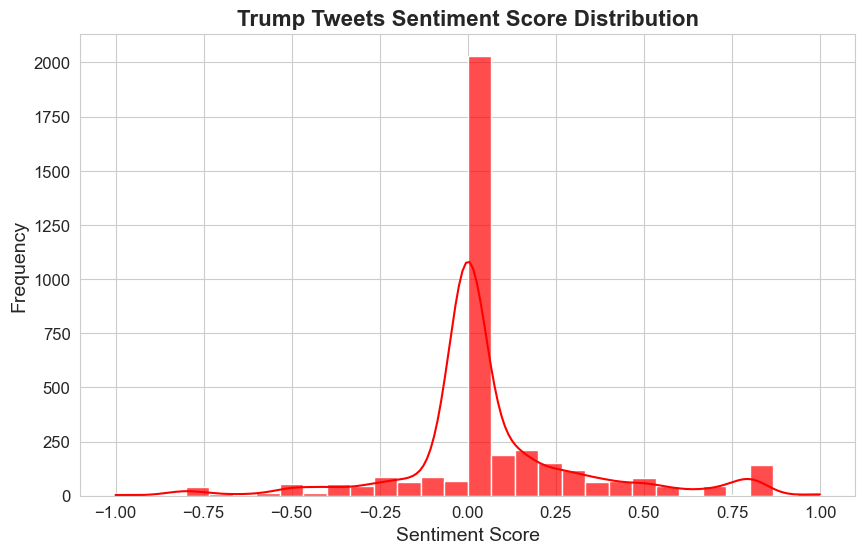

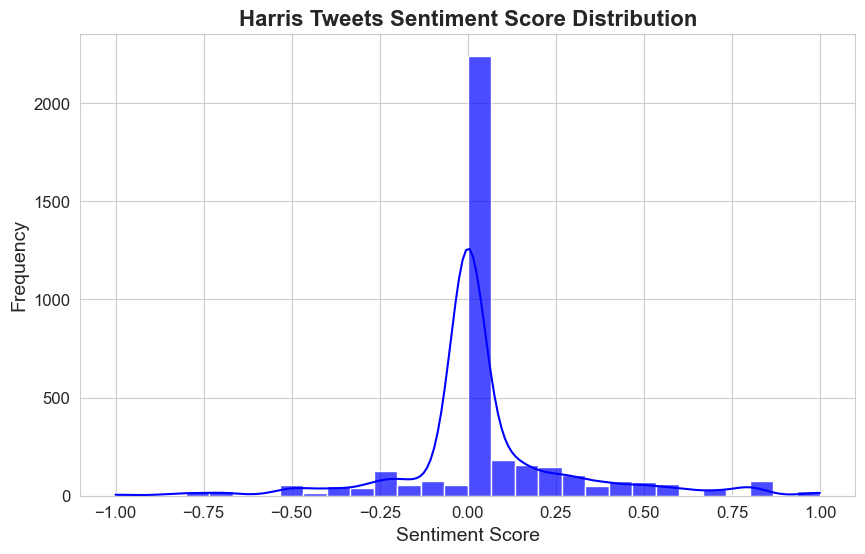

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot sentiment scores
def plot_sentiment_scores(df, title, color='blue'):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['TextBlob'], bins=30, kde=True, color=color, alpha=0.7)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Sentiment Score", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plot for Trump tweets with red bars
plot_sentiment_scores(trump_df_filtered, "Trump Tweets Sentiment Score Distribution", color='red')

# Plot for Harris tweets with default blue bars
plot_sentiment_scores(harris_df_filtered, "Harris Tweets Sentiment Score Distribution")


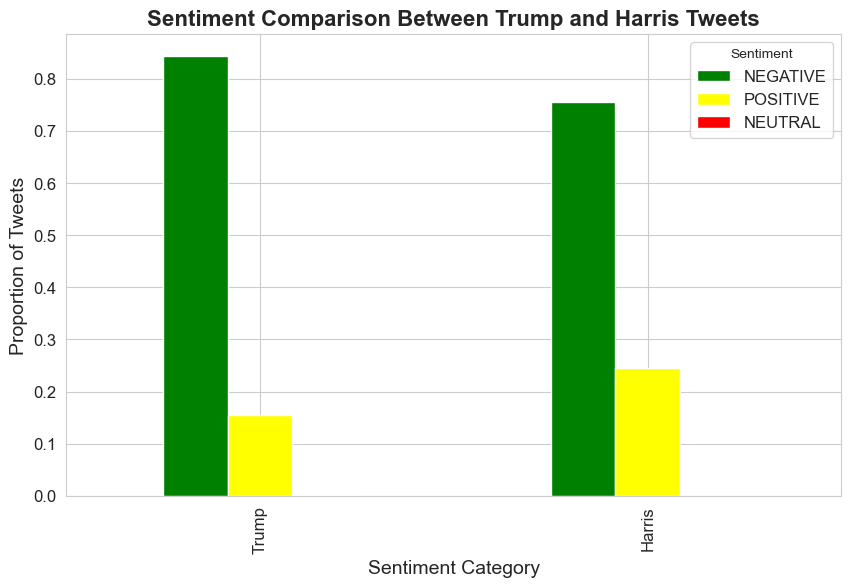

### 1️⃣ Pie Chart: Sentiment Distribution

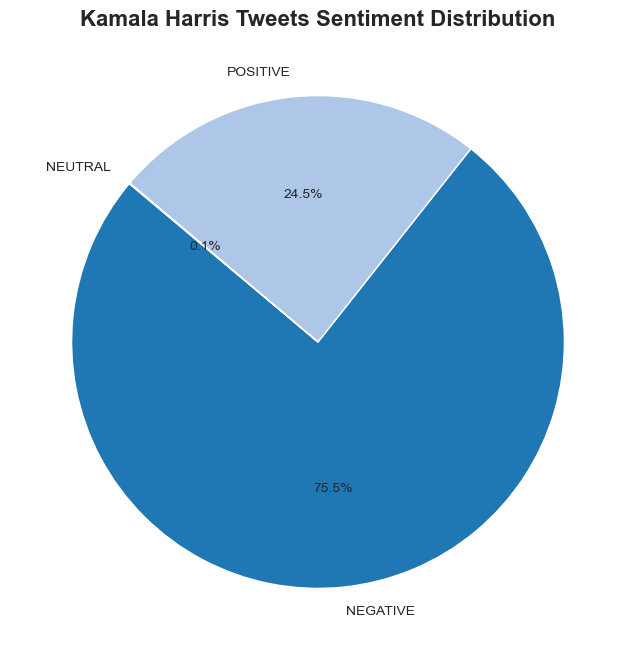

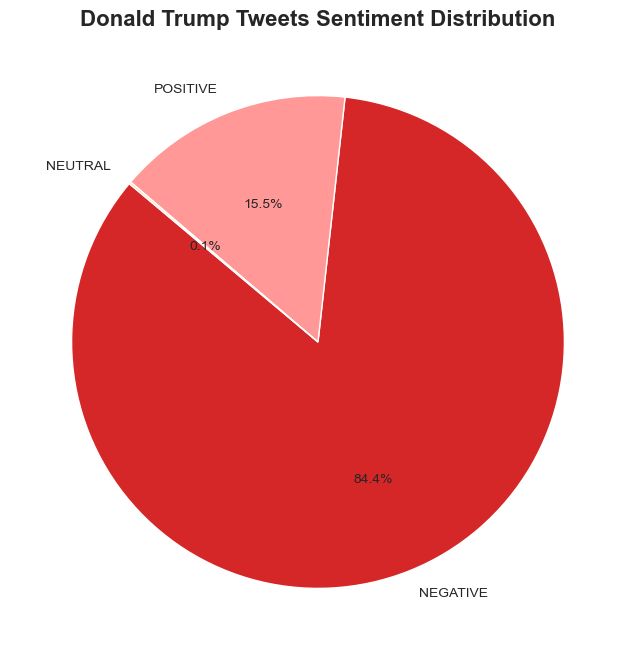

In [104]:
import matplotlib.pyplot as plt

# Function to plot a pie chart for sentiment distribution with custom colors
def plot_pie_chart(df, title, colors):
    sentiment_counts = df['Flair_label'].value_counts(normalize=True) * 100  # Convert to percentage
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

# Define custom colors for Kamala Harris (blue shades) and Donald Trump (red shades)
kamala_colors = ["#1f77b4", "#aec7e8", "#c6dbef"]  # Blue shades
trump_colors = ["#d62728", "#ff9896", "#fdd0a2"]   # Red shades

# Plot Pie Chart for Kamala Harris
plot_pie_chart(harris_df_filtered, "Kamala Harris Tweets Sentiment Distribution", kamala_colors)

# Plot Pie Chart for Donald Trump
plot_pie_chart(trump_df_filtered, "Donald Trump Tweets Sentiment Distribution", trump_colors)


### 2️⃣ Heatmap: Sentiment Correlation

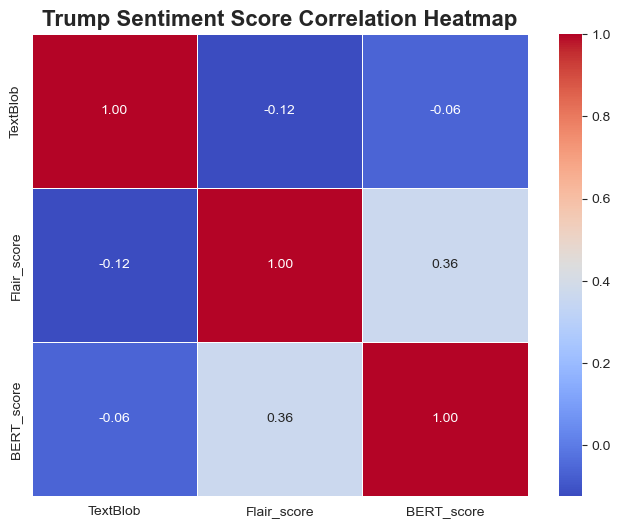

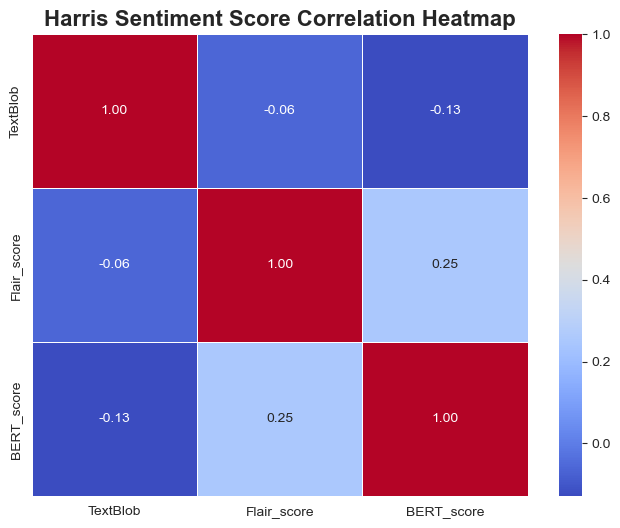

In [114]:
import seaborn as sns

# Function to plot a heatmap of sentiment score correlations
def plot_sentiment_heatmap(df, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[['TextBlob', 'Flair_score', 'BERT_score']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

# Plot Heatmap for Trump and Harris
plot_sentiment_heatmap(trump_df_filtered, "Trump Sentiment Score Correlation Heatmap")
plot_sentiment_heatmap(harris_df_filtered, "Harris Sentiment Score Correlation Heatmap")
